This dataset and description has been downloaded via Kaggle https://www.kaggle.com/datasets/selfvivek/environment-impact-of-food-production

__Context__

As the world’s population has expanded and gotten richer, the demand for food, energy and water has seen a rapid increase. Not only has demand for all three increased, but they are also strongly interlinked: food production requires water and energy; traditional energy production demands water resources; agriculture provides a potential energy source. This article focuses on the environmental impacts of food. Ensuring everyone in the world has access to a nutritious diet in a sustainable way is one of the greatest challenges we face.

__Content__

This dataset contains most 43 most common foods grown across the globe and 23 columns as their respective land, water usage and carbon footprints.

__Columns__

Land use change - Kg CO2 - equivalents per kg product
Animal Feed - Kg CO2 - equivalents per kg product
Farm - Kg CO2 - equivalents per kg product
Processing - Kg CO2 - equivalents per kg product
Transport - Kg CO2 - equivalents per kg product
Packaging - Kg CO2 - equivalents per kg product
Retail - Kg CO2 - equivalents per kg product
These represent greenhouse gas emissions per kg of food product(Kg CO2 - equivalents per kg product) across different stages in the lifecycle of food production.

Eutrophication – the pollution of water bodies and ecosystems with excess nutrients – is a major environmental problem. The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import plotly.express as px
import plotly.io as pio
pio.renderers.default="notebook"

%matplotlib inline

food = pd.read_csv("Food_Production.csv")
print(food.shape, "\n")
print(food.info(), "\n")
print("Percent data missing:\n", round(food.isnull().sum()/food.shape[1]*100,1))

#set animal related food products with a tag, 0 for not related to animals and 1 means related to animals
a = np.full(43,0)
a[33:] = 1
a = pd.DataFrame(a,columns=["Meat_related"])
food = pd.concat([food, pd.DataFrame(a)], axis=1)

(43, 23) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                         

After having a look an overview of the dataset a few graphs can be plotted to show an overview of what the data is showing.  Initially only the emissions CO2 per kg food product produced are shown as there is full data

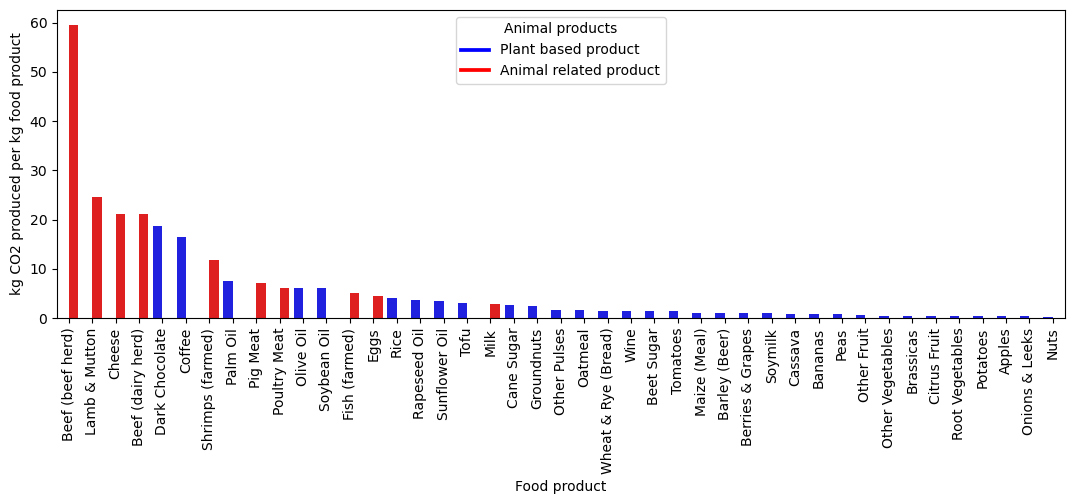

       Land use change  Animal Feed       Farm  Processing  Transport  \
count        43.000000    43.000000  43.000000   43.000000  43.000000   
mean          1.260465     0.453488   3.469767    0.253488   0.195349   
std           3.357730     0.919200   7.083264    0.372475   0.158795   
min          -2.100000     0.000000   0.100000    0.000000   0.000000   
25%           0.000000     0.000000   0.350000    0.000000   0.100000   
50%           0.200000     0.000000   0.800000    0.100000   0.100000   
75%           0.800000     0.000000   2.200000    0.300000   0.200000   
max          16.300000     2.900000  39.400000    1.300000   0.800000   

        Packging     Retail  
count  43.000000  43.000000  
mean    0.269767   0.069767  
std     0.342633   0.110270  
min     0.000000   0.000000  
25%     0.100000   0.000000  
50%     0.100000   0.000000  
75%     0.300000   0.150000  
max     1.600000   0.300000  


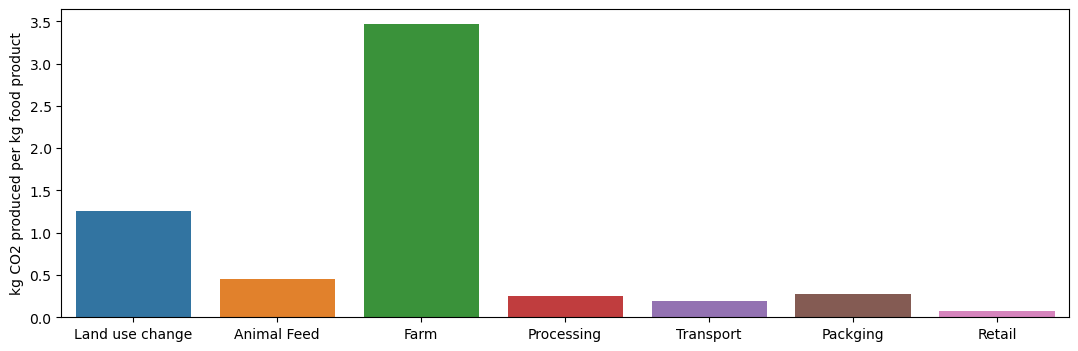

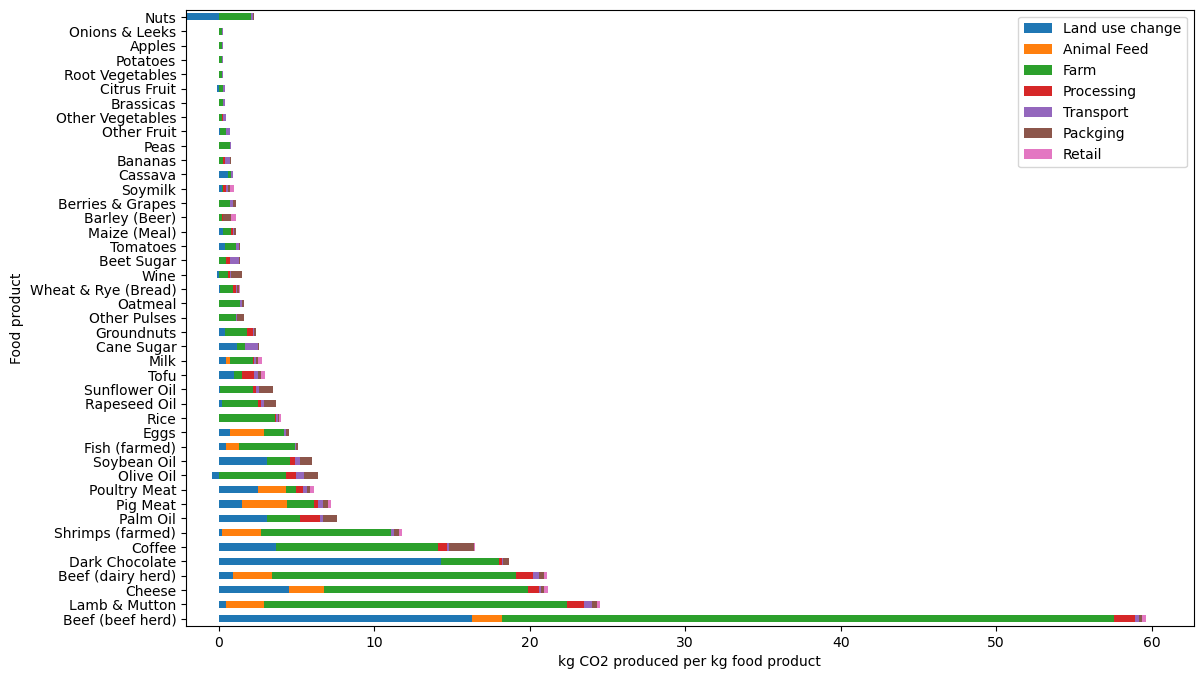

In [2]:
#total emissions
fig, ax = plt.subplots()
fig.set_size_inches(13, 4)
ax = sns.barplot(data=food.sort_values("Total_emissions", ascending=False),\
                 x="Food product", y="Total_emissions",  palette=["b","r"], hue="Meat_related")
plt.xticks(rotation=90)
plt.ylabel("kg CO2 produced per kg food product")
plt.legend(title="Animal products", loc="best", labels=["Plant based product", "Animal related product"])
ax.get_legend().legendHandles[0].set_color("b")
ax.get_legend().legendHandles[1].set_color("r")
plt.show()

#describe the data to see if all data looks reasonable
print(food.iloc[:,:8].describe())

#show emissions by category
fig, ax = plt.subplots()
fig.set_size_inches(13, 4)
ax = sns.barplot(data=food.iloc[:,1:8], ci=None)
plt.ylabel("kg CO2 produced per kg food product")
plt.show()

#show emissions by food broken down by category
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
food.sort_values("Total_emissions", ascending=False).set_index("Food product").iloc[:,:7].plot(kind="barh",stacked=True, ax=ax)
plt.xlabel("kg CO2 produced per kg food product")
plt.show()

Generally animal based products have much higher emissions per kg food product, and farming is the highest cause of emissions.  Despite there being large efforts to shop locally to reduce emissions, transport is only a minor contribution to emissions so picking certain products to eat would have a much bigger impact than where you buy them from

The other emissions can be plotted in a simalar way to show overall emissions.  I have chosen to display emissions per 1000kcal as humans need a certain number of calories per day rather than a certain weight of food per day

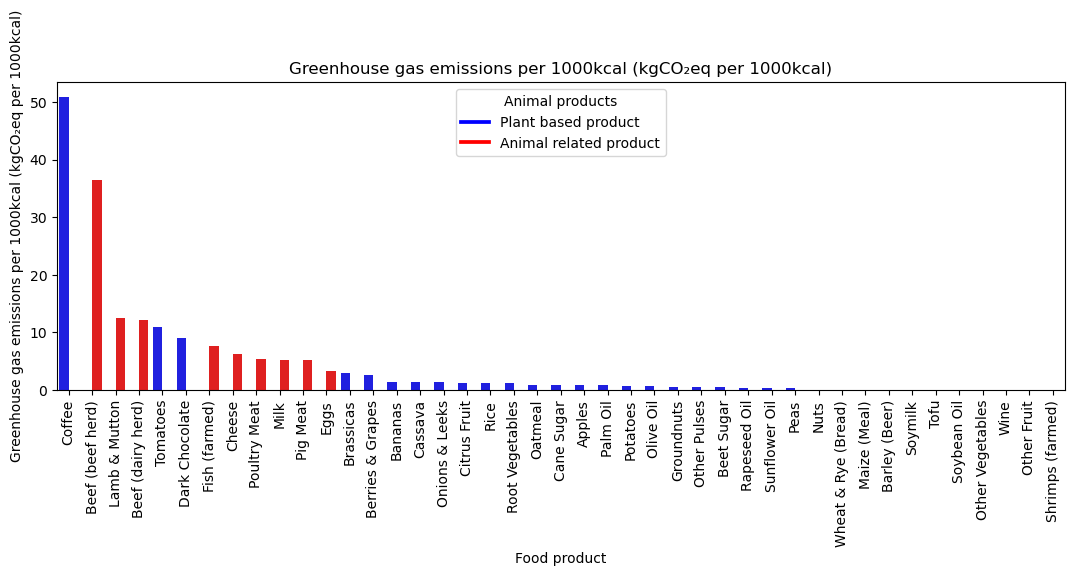

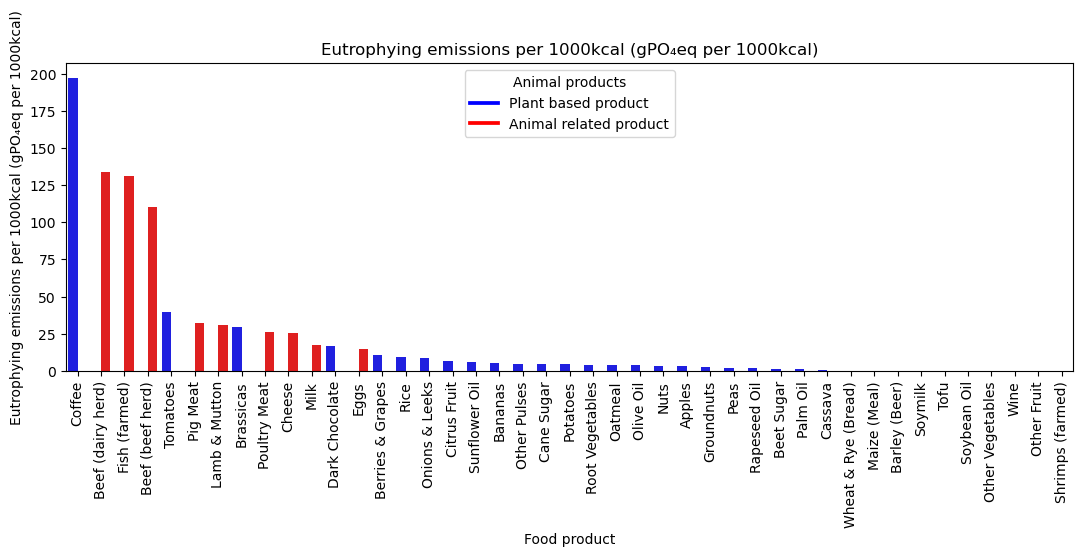

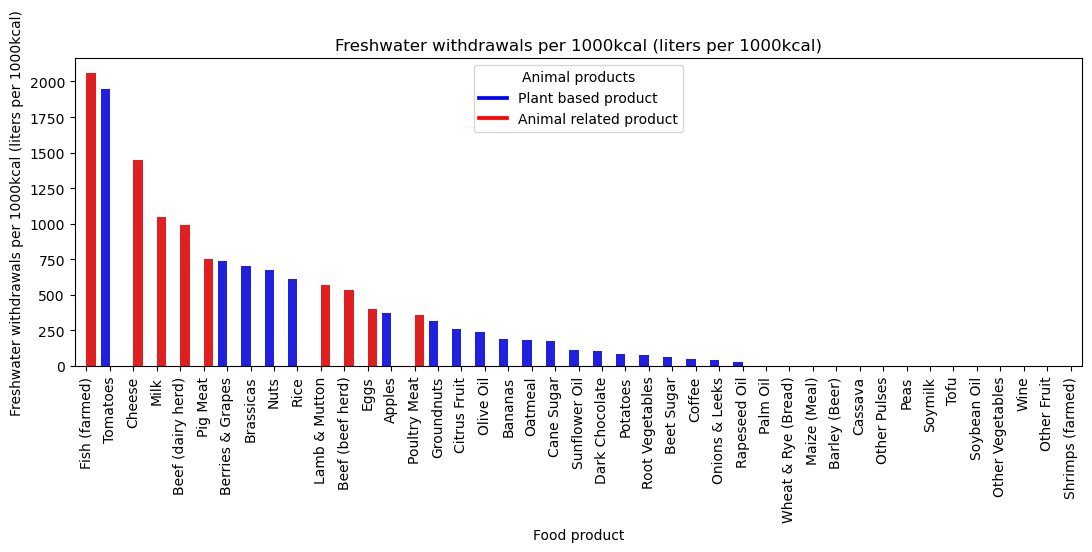

In [3]:
def plot_emissions(variable):
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 4)
    ax = sns.barplot(data=food.sort_values(variable, ascending=False),\
                     x="Food product", y=variable, palette=["b","r"], hue="Meat_related")
    plt.title(variable)
    plt.legend(title="Animal products", loc="best", labels=["Plant based product", "Animal related product"])
    ax.get_legend().legendHandles[0].set_color("b")
    ax.get_legend().legendHandles[1].set_color("r")
    plt.xticks(rotation=90)
    plt.show()

#Graphs for all sources of emissions per 1000kcal to show what's has most impact

plot_emissions("Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)")
plot_emissions("Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)")
plot_emissions("Freshwater withdrawals per 1000kcal (liters per 1000kcal)")

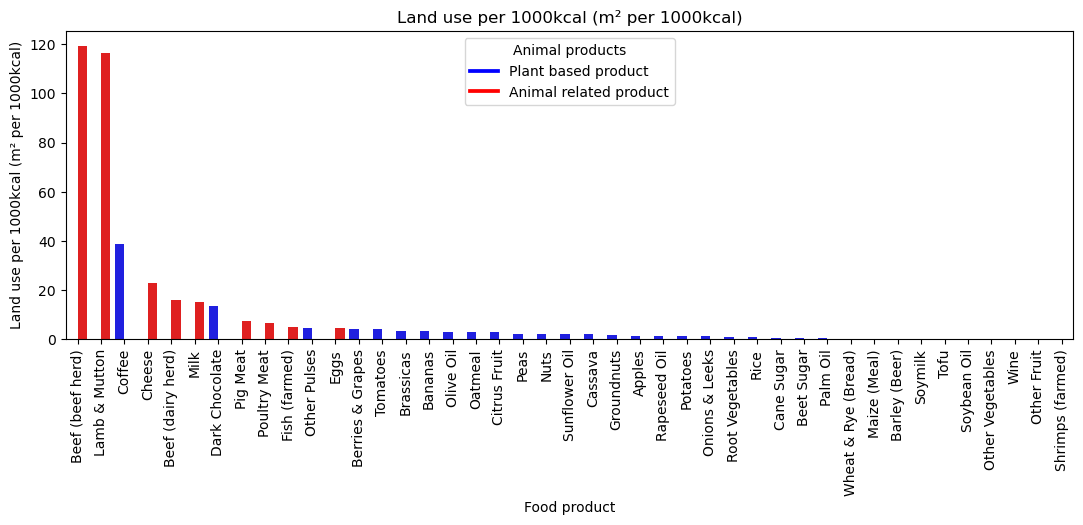

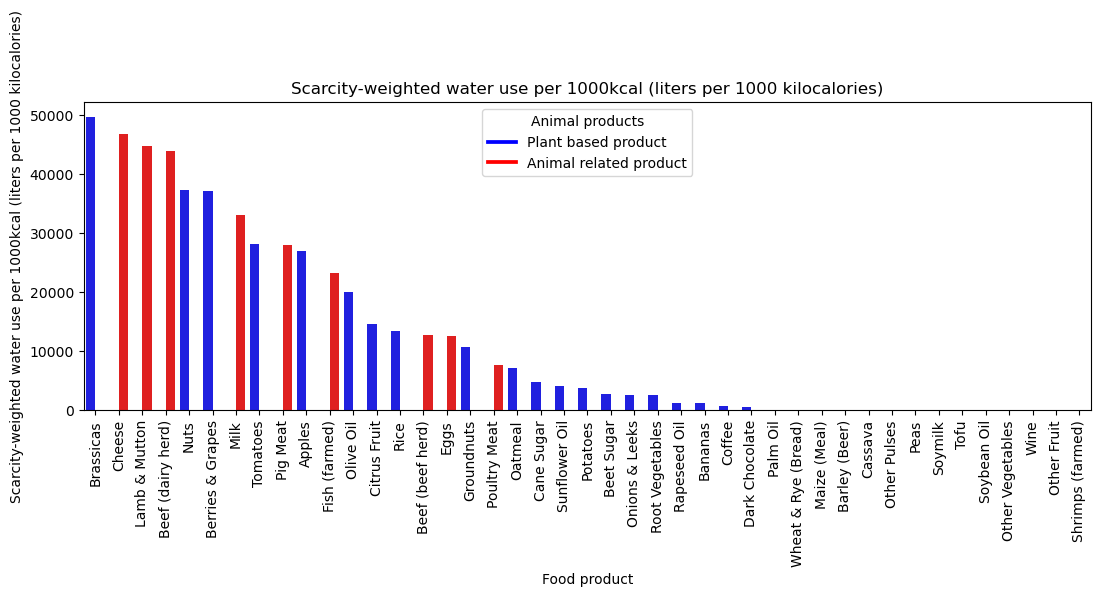

In [4]:
plot_emissions("Land use per 1000kcal (m² per 1000kcal)")
plot_emissions("Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)")

Similar to earlier generally meat based products are worse in terms of emissions than plants

Next a cluster analysis (using k-means) is performed to see if anything interesting can be viewed.  A bit more data cleaning is needed as all values must exist for k-means to work

Rows of na: 10
Rows with some na: 13
3       Oatmeal
6       Cassava
7    Cane Sugar
Name: Food product, dtype: object


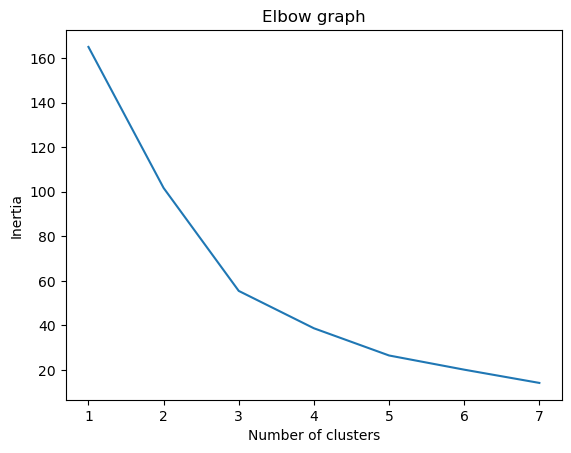

In [5]:
#Extract what's needed for cluster analysis
X = pd.DataFrame({"Eutrophy": food["Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)"],\
                  "Fresh water": food["Freshwater withdrawals per 1000kcal (liters per 1000kcal)"],\
                  "Greenhouse gas": food["Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"],\
                  "Land use": food["Land use per 1000kcal (m² per 1000kcal)"],\
                  "Water use (weighted to scarcity)": food["Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"]})

#see where NAs are
print("Rows of na:", X.isna().all(axis=1).sum())
print("Rows with some na:", X.isna().any(axis=1).sum())

#drop where all of the row is NA leaving 3 rows left
X.dropna(axis=0, how="all", inplace=True)
#view items which are missing to see if they can be found elsewhere on the internet
print(food.iloc[np.unique(np.where(X.isna())[0])]["Food product"])

#impute values rather than fill to zero, while it isn't ideal it's better than zero
imputer = SimpleImputer()
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns,index=X.index)

#scale the items to apply the cluster analysis
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns,index=X.index)

#find the distance of points from centroids for different numbers of clusters
inertia = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
#plot elbow graph to find best number of clusters
plt.plot(range(1,8),inertia)
plt.title("Elbow graph")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

From this graph 3 clusters looks like the best number to pick.  By applying a PCA reduction a 3D graph can be plotted to visualise emissions for all 5 categories

PCA accounts for: 93.6% variance


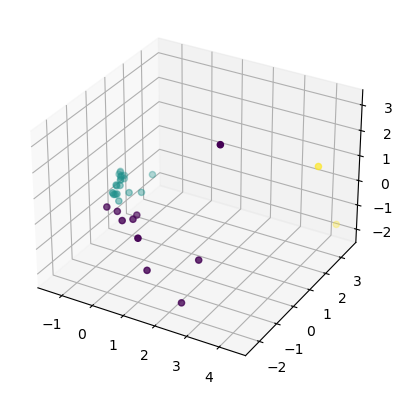

In [6]:
#pick 3 clusters
def kmeans_visualise(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    kmeans.fit(X)

    n_components = 3
    pca = PCA(n_components=n_components)
    pca_values = pd.DataFrame(pca.fit_transform(X))
    pca_values = pd.concat([pca_values, pd.DataFrame(kmeans.labels_,columns=[3])],axis=1)

    print(f"PCA accounts for: {round(pca.explained_variance_ratio_.cumsum()[2]*100,1)}% variance")

    #preserve food names
    pca_values.index = X.index
    pca_values = pca_values.merge(food["Food product"], how="left", left_index=True,right_index=True)

    #plot a figure
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pca_values[0],pca_values[1],pca_values[2],c=pca_values[3])
    plt.show()
    
    '''The following is commented out as doesn't work on Github, but produces an interactive graph using plotly
    fig = px.scatter_3d(pca_values, x=0,y=1,z=2,color=3,hover_name="Food product")
    fig.show()
    '''
    
#visualise kmeans with 3 clusters
kmeans_visualise(3)

There are 3 major outliers: Coffee, Beef (meat), and Lamb & Mutton.  They are big outliers from the crown though using 3 clusters doesn't group anything too interesting so it can be visualised into 2 clusters to create a "higher" and "lower"

PCA accounts for: 93.6% variance


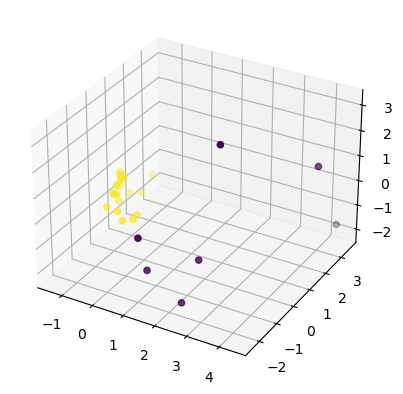

In [7]:
#visualise kmeans with 3 clusters
kmeans_visualise(2)

This creates 7 "higher" items: Beef (meat), Coffee, Lamb & Mutton, Beef (dairy), Fish (farmed), Cheese, and Tomatoes

Lastly a score by adding up scaled values can be created to rank the overall environmental impact of each item relative to others in this dataset

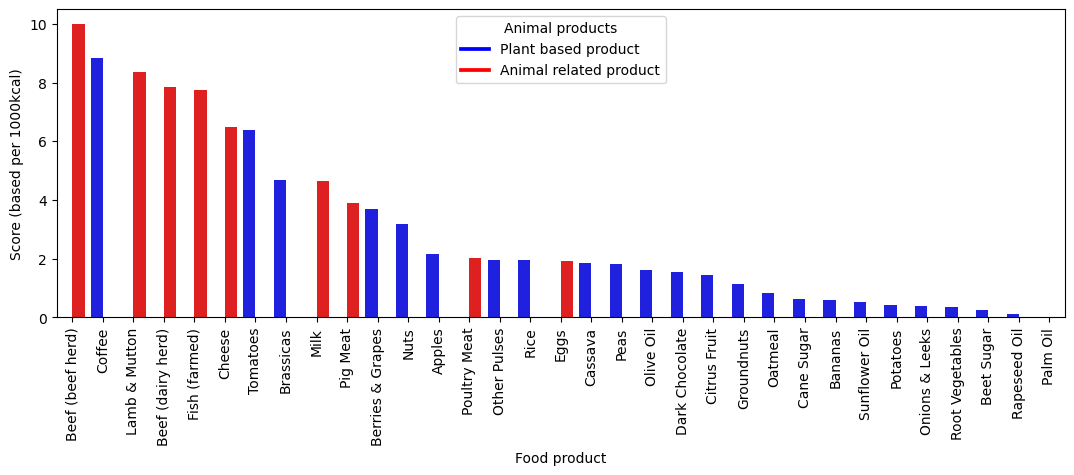

In [8]:
overall_impact = pd.DataFrame(X.sum(axis=1).sort_values(ascending=False),columns=["Score"])
overall_impact = overall_impact.merge(food[["Food product","Meat_related"]], how="left", left_index=True,right_index=True)
overall_impact["Score"] = overall_impact["Score"] + abs(overall_impact["Score"].min())
overall_impact["Score"] = overall_impact["Score"] * 10 / abs(overall_impact["Score"].max())

fig, ax = plt.subplots()
fig.set_size_inches(13, 4)
ax = sns.barplot(data=overall_impact,\
                 x="Food product", y="Score", palette=["b","r"], hue="Meat_related")
plt.legend(title="Animal products", loc="best", labels=["Plant based product", "Animal related product"])
ax.get_legend().legendHandles[0].set_color("b")
ax.get_legend().legendHandles[1].set_color("r")
plt.ylabel("Score (based per 1000kcal)")
plt.xticks(rotation=90)
plt.show()

The top items are the same as what k-means clustering has highlighted

Some other interesting things to note:

Overall meat related foods have a higher (i.e. worse) overall score

Palm oil has the least impact relative to other categories per unit energy, this is due to the energy density of the product as the emissions per kg were found to be 8th highest.  From looking at other sources the water comes from roughly 90-95% rainwater, 5-9% grey water, and only 1-3% fresh water.  The negative media information comes largely due to such large quantities of the oil being grown which are needed for such a large human population and that deforestation of 'precious' forests occurs to cater for the large demand

Brassicas and tomatos score very poorly, this is due to the amount of freshwater needed in water-scarce areas

Coffee scores very poorly, however because of such low calorie density perhaps it isn't fair to compare coffee in the same way